Q2. Implement data visualization and Develop a Linear (OLS-Ordinary least squares)
regression model for the selected data to predict monthly income.

Importing data After EDA (file name is Final.CSV)

In [1]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
import matplotlib.patches as mpatches
from matplotlib.patches import Patch
import numpy as np
df = pd.read_csv("final.csv")
print(df)

        Unnamed: 0  Hours worked  Monthly income  Race_ASIAN            \
0                0      0.646955        0.285397                   0.0   
1                1      0.664607        0.344023                   0.0   
2                2      0.646955        0.531206                   0.0   
3                3      0.470432        0.718486                   0.0   
4                4      0.117387        0.264473                   0.0   
...            ...           ...             ...                   ...   
128981      128981      0.646955        0.491480                   0.0   
128982      128982      0.646955        0.412027                   0.0   
128983      128983      0.646955        0.695785                   0.0   
128984      128984      0.646955        0.337115                   0.0   
128985      128985      0.646955        0.468779                   0.0   

        Race_BLACK            Race_HISPANIC         Race_OTHER            \
0                        0.0       

In [2]:
df = df.drop(df.columns[0], axis=1)
df

,Hours worked,Monthly income,Race_ASIAN,Race_BLACK,Race_HISPANIC,Race_OTHER,Race_WHITE,Gender_MALE,Employee type_CRP - CLASSIFIED REGULAR PART-TIME,Employee type_CTF - CLASSIFIED TEMPORARY FULL-TIME,Employee type_CTP - CLASSIFIED TEMPORARY PART-TIME,Employee type_ERF - EXEMPT REGULAR FULL-TIME,Employee type_URF - UNCLASSIFIED REGULAR FULL-TIME,Employee type_URP - UNCLASSIFIED REGULAR PART-TIME,Employee type_UTF - UNCLASSIFIED TEMPORARY FULL-TIME,Employee type_UTP - UNCLASSIFIED TEMPORARY PART-TIME
0,0.646955,0.285397,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.664607,0.344023,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.646955,0.531206,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.470432,0.718486,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.117387,0.264473,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128981,0.646955,0.491480,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
128982,0.646955,0.412027,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128983,0.646955,0.695785,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
128984,0.646955,0.337115,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Linear Regression - Ordinary Least Squares (OLS)
'''In statistics, ordinary least squares (OLS) is a type of linear least squares method for choosing the unknown parameters in a linear regression model (with fixed level-one[clarification needed] effects of a linear function of a set of explanatory variables) by the principle of least squares: minimizing the sum of the squares of the differences between the observed dependent variable (values of the variable being observed) in the input dataset and the output of the (linear) function of the independent variable. Some sources consider OLS to be linear regression'''

*In this OLS will fir a linear model to pridict Monthly Income based on the input Variables Race, Gender, Employee type, and Hours worked.
*We have convered Race, Gender, Employee type into dummy variables.
*The dataset is divided into training and testing sets to evaluate model performance.
*Linear Regression using OLS is applied to the training data, fitting the model to predict the target variable, Monthly income.
*The model predicts Monthly income for both the training and testing datasets.
*The Mean Squared Error (MSE) is calculated for both the training and test data predictions to assess prediction accuracy.
*The testing accuracy is calculated to evaluate how well the model generalizes to unseen data.
*The actual vs. predicted values of Monthly income are visualized to compare the model’s performance.

In [7]:
y = df['Monthly income']
X = df.drop('Monthly income',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1234)

In [8]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

linear_pred_test = linear_reg.predict(X_test)
linear_pred_train = linear_reg.predict(X_train)

In [9]:
test_error_ols = mean_squared_error(y_test, linear_pred_test)
train_error_ols = mean_squared_error(y_train, linear_pred_train)

print("Train MSE: ", train_error_ols)
print("Test MSE: ", test_error_ols)

score_ols = linear_reg.score(X_train, y_train)
print("R-squared (OLS):", score_ols)

Train MSE:  0.02975321244660865
Test MSE:  0.029826180974963545
R-squared (OLS): 0.1094984401289274


In linear regression, "R-squared" (denoted as R²) is a statistical measure that indicates how well a regression line fits the data, essentially representing the proportion of variance in the dependent variable that is explained by the independent variable(s) in the model; a higher R-squared value signifies a better fit, with a value ranging from 0 (no explanatory power) to 1 (perfect fit)

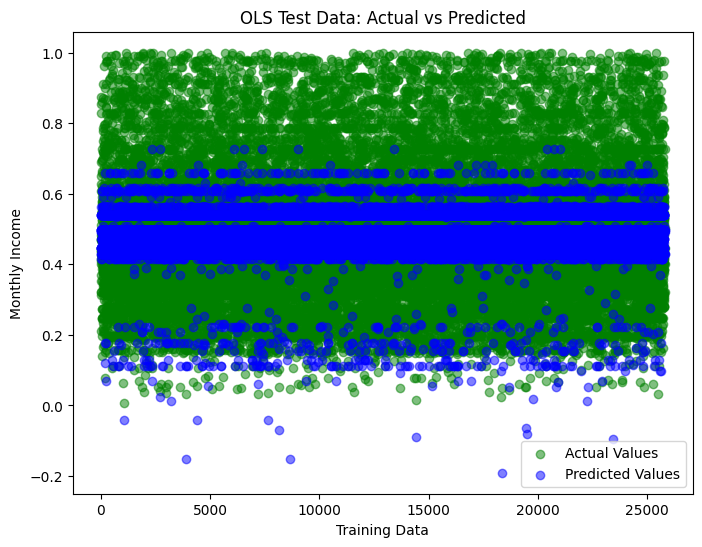

In [12]:
plt.figure(figsize=(8,6))
plt.scatter(range(len(y_test)), y_test, color='Green', alpha=0.5, label='Actual Values')    
plt.scatter(range(len(y_test)), linear_pred_test, color='blue', alpha=0.5, label='Predicted Values') 
plt.title('OLS Test Data: Actual vs Predicted')
plt.xlabel('Training Data')
plt.ylabel('Monthly Income')
plt.legend()
plt.show()

Because the model's MSE values are so low, it may be said to forecast monthly revenue with some degree of accuracy. Unfortunately, the model isn't explaining much of the fluctuation in monthly revenue, as seen by the R-squared value of just 11%. 

### Linear Regression - Stochasic Gradient Descent (SGD)

Learning Rate: 0.0001, Train MSE: 0.030115542717174613, Test MSE: 0.030165705935693336, R-Squared: 0.10311546074882849
Learning Rate: 0.001, Train MSE: 0.029915708507029612, Test MSE: 0.02996543629198063, R-Squared: 0.10906986299322408
Learning Rate: 0.01, Train MSE: 0.03009659935194522, Test MSE: 0.030140351685781164, R-Squared: 0.1038692914332161
Learning Rate: 1, Train MSE: 8.228059206971201e+23, Test MSE: 8.339489618596213e+23, R-Squared: -2.4794908894588347e+25


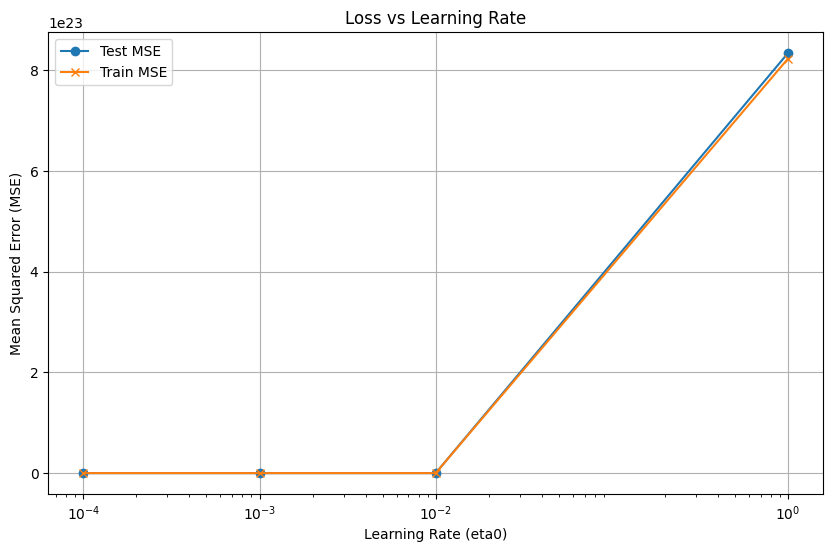

The best learning rate is: 0.001


In [22]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Set the learning rates to test
learning_rates = [0.0001, 0.001, 0.01, 1]  # Different learning rates
losses = []  
train_losses = [] 

# Train the model and evaluate each learning rate
for eta0 in learning_rates:
    
    model = SGDRegressor(learning_rate='constant', eta0=eta0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train) 

   
    y_train_pred = model.predict(X_train)  
    y_test_pred = model.predict(X_test)    

    # Calculate MSE for training and test data
    train_mse = mean_squared_error(y_train, y_train_pred)  
    test_mse = mean_squared_error(y_test, y_test_pred)  
    losses.append(test_mse)  
    train_losses.append(train_mse)  

    # Calculate R-squared value for test data
    r_squared = r2_score(y_test, y_test_pred)

    # Print the current learning rate
    print(f'Learning Rate: {eta0}, Train MSE: {train_mse}, Test MSE: {test_mse}, R-Squared: {r_squared}')

# Visualize the results
plt.figure(figsize=(10, 6))  
plt.plot(learning_rates, losses, marker='o', label='Test MSE')  
plt.plot(learning_rates, train_losses, marker='x', label='Train MSE') 
plt.xscale('log')  
plt.title('Loss vs Learning Rate')  
plt.xlabel('Learning Rate (eta0)')  
plt.ylabel('Mean Squared Error (MSE)')  
plt.xticks(learning_rates)  
plt.grid(True) 
plt.legend()  
plt.show()  

# Find the best learning rate
best_lr = learning_rates[np.argmin(losses)]  
print(f"The best learning rate is: {best_lr}") 

### Linear Regression - Ridge

In [25]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

ridge_reg = Ridge(alpha=0.01, max_iter=1000, tol=0.1, solver= "auto", random_state=1)
ridge_reg.fit(X_train, y_train)

ridge_pred_test = ridge_reg.predict(X_test)
ridge_pred_train = ridge_reg.predict(X_train)

test_error_ridge = mean_squared_error(y_test, ridge_pred_test)
train_error_ridge = mean_squared_error(y_train, ridge_pred_train)

print("Train MSE: ", train_error_ridge)
print("Test MSE: ", test_error_ridge)

score_ridge = ridge_reg.score(X_train, y_train)
print("R-squared:", score_ridge)

Train MSE:  0.029753212587735663
Test MSE:  0.029826149896065243
R-squared: 0.10949843590505326


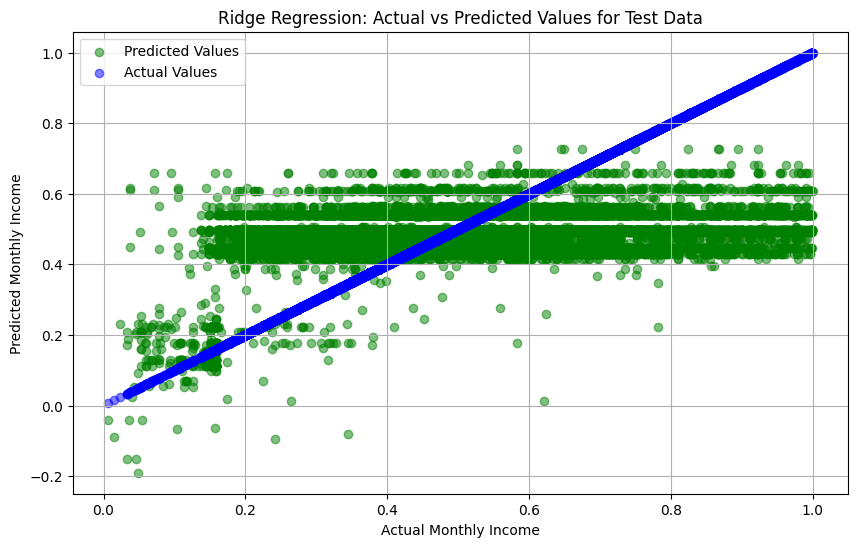

In [28]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, ridge_pred_test, color='green', alpha=0.5, label='Predicted Values')    
plt.scatter(y_test, y_test, color='blue', alpha=0.5, label='Actual Values')  
plt.title('Ridge Regression: Actual vs Predicted Values for Test Data')
plt.xlabel('Actual Monthly Income')
plt.ylabel('Predicted Monthly Income')
plt.legend()
plt.grid(True)
plt.show()

### Linear Regression - Lasso

In [29]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

lasso_reg = Lasso(alpha=0.001, max_iter=1000, tol=0.1, random_state=1)
lasso_reg.fit(X_train, y_train)

lasso_pred_test = lasso_reg.predict(X_test)
lasso_pred_train = lasso_reg.predict(X_train)

test_error_lasso = mean_squared_error(y_test, lasso_pred_test)
train_error_lasso = mean_squared_error(y_train, lasso_pred_train)

print("Train MSE: ", train_error_lasso)
print("Test MSE: ", test_error_lasso)

score_lasso = lasso_reg.score(X_train, y_train)
print("R-squared:", score_lasso)

Train MSE:  0.03041330731024641
Test MSE:  0.030485568323415778
R-squared: 0.08974206905514415


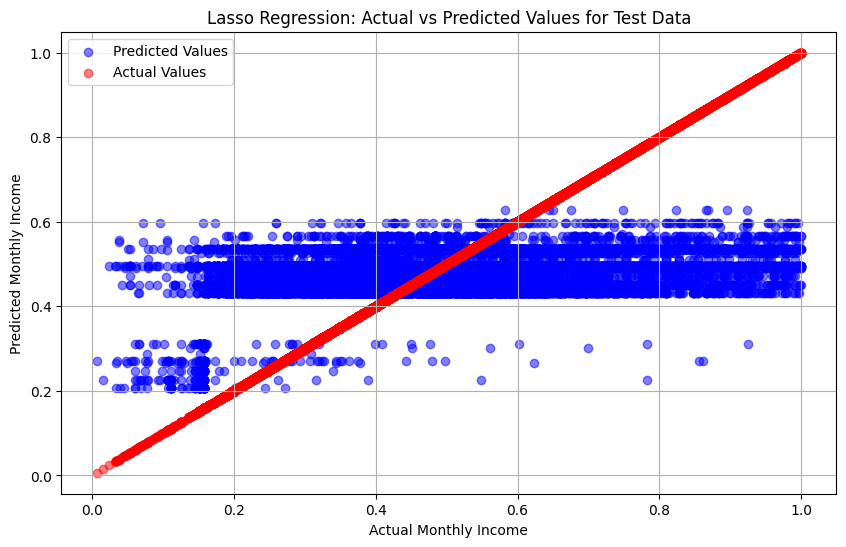

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lasso_pred_test, color='blue', alpha=0.5, label='Predicted Values')    
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual Values') 
plt.title('Lasso Regression: Actual vs Predicted Values for Test Data')
plt.xlabel('Actual Monthly Income')
plt.ylabel('Predicted Monthly Income')
plt.legend()
plt.grid(True)
plt.show()

### Linear Regression - Elastic Net

In [34]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

elasticNet_reg = ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=1000, tol=0.1, random_state=1)
elasticNet_reg.fit(X_train, y_train)

elasticNet_pred_test = elasticNet_reg.predict(X_test)
elasticNet_pred_train = elasticNet_reg.predict(X_train)

In [35]:
test_error_enet = mean_squared_error(y_test, elasticNet_pred_test)
train_error_enet = mean_squared_error(y_train, elasticNet_pred_train)

print("Train MSE: ", train_error_enet)
print("Test MSE: ", test_error_enet)

score_enet = elasticNet_reg.score(X_train, y_train)
print("R-squared:", score_enet)

Train MSE:  0.030150676050201025
Test MSE:  0.030212024481216487
R-squared: 0.09760251596187741


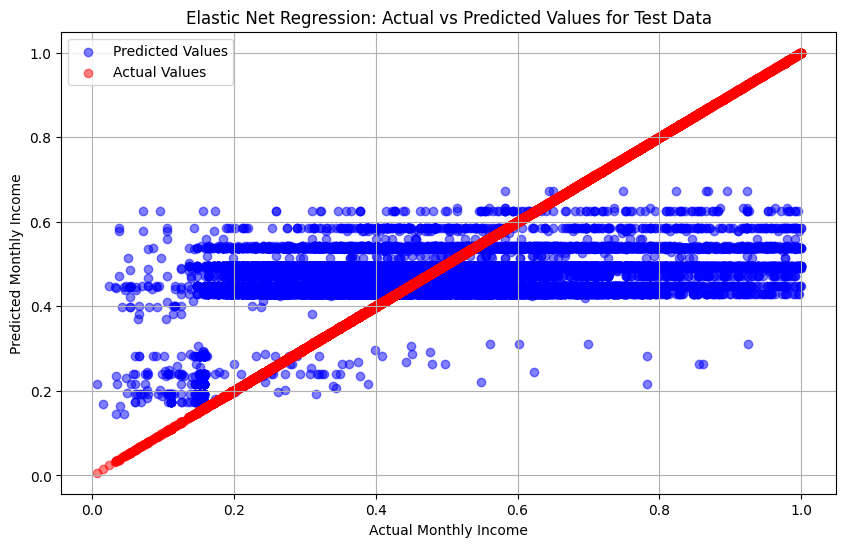

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, elasticNet_pred_test, color='blue', alpha=0.5, label='Predicted Values')    
plt.scatter(y_test, y_test, color='red', alpha=0.5, label='Actual Values')  # 45-degree line for actual values
plt.title('Elastic Net Regression: Actual vs Predicted Values for Test Data')
plt.xlabel('Actual Monthly Income')
plt.ylabel('Predicted Monthly Income')
plt.legend()
plt.grid(True)
plt.show()

### Polynomial Regression

In [43]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

poly = PolynomialFeatures(degree=2) 
X_poly_train = poly.fit_transform(X_train)  
X_poly_test = poly.transform(X_test)  


model = LinearRegression()  
model.fit(X_poly_train, y_train)  

# Make predictions on both training and test data
y_train_pred = model.predict(X_poly_train)  
y_test_pred = model.predict(X_poly_test) 

#Calculate Mean Squared Error (MSE) and R-squared
mse_train = mean_squared_error(y_train, y_train_pred)  
mse_test = mean_squared_error(y_test, y_test_pred)  
r2_test = r2_score(y_test, y_test_pred)  

# Print the results
print("Mean Squared Error (MSE) for Training Data:", round(mse_train, 6))
print("Mean Squared Error (MSE) for Test Data:", round(mse_test, 6))
print("R-Squared Value (Test Accuracy):", round(r2_test, 6))

Mean Squared Error (MSE) for Training Data: 0.029628
Mean Squared Error (MSE) for Test Data: 0.029773
R-Squared Value (Test Accuracy): 0.114786


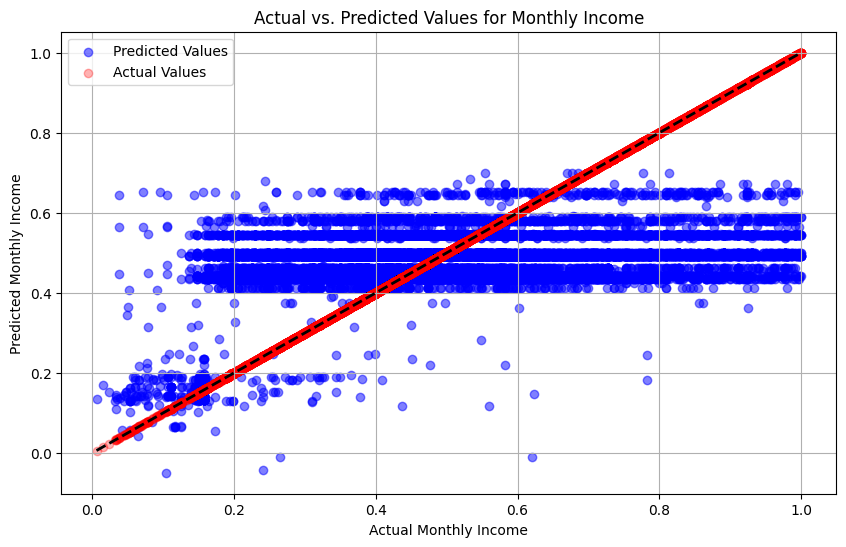

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, color='blue', alpha=0.5, label='Predicted Values') 
plt.scatter(y_test, y_test, color='red', alpha=0.3, label='Actual Values') 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  
plt.title('Actual vs. Predicted Values for Monthly Income')
plt.xlabel('Actual Monthly Income')
plt.ylabel('Predicted Monthly Income')
plt.legend()
plt.grid(True)
plt.show()

## Q5. Discuss how the resulting Models can be useful. 

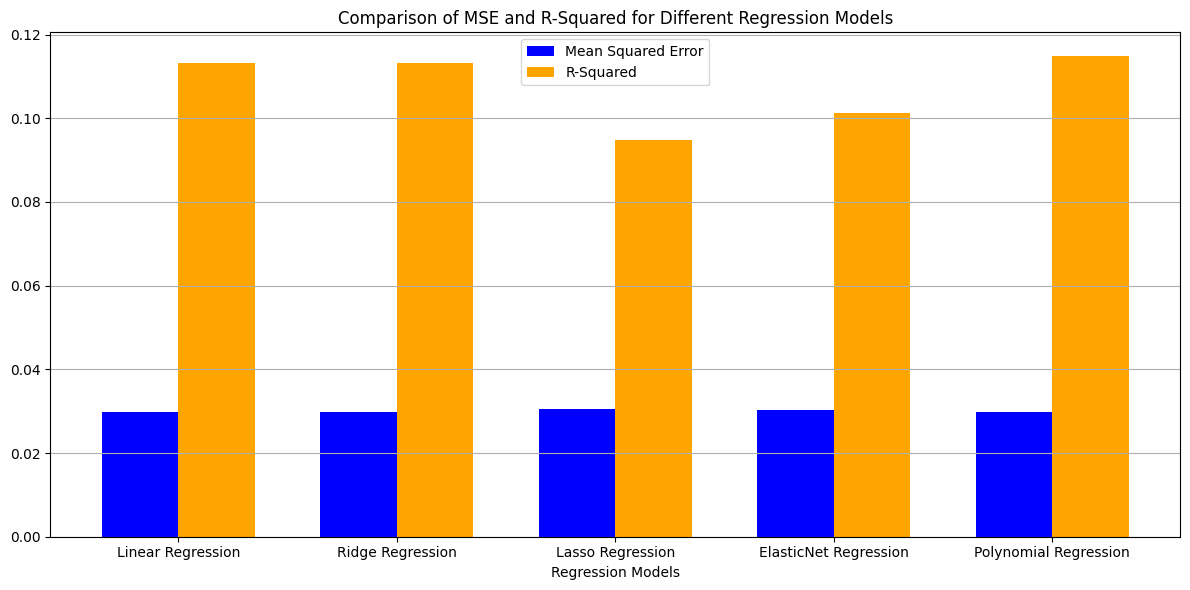

In [48]:
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=0.01),
    'Lasso Regression': Lasso(alpha=0.001),
    'ElasticNet Regression': ElasticNet(alpha=0.001, l1_ratio=0.5),
    'Polynomial Regression': LinearRegression()  # Use for polynomial regression
}

# Create lists to store MSE and R-squared results
mse_results = {}
r2_results = {}

# Fit models, predict, and calculate MSE and R-squared
for model_name, model in models.items():
    if model_name == 'Polynomial Regression':
        # Create polynomial features
        poly = PolynomialFeatures(degree=2)
        X_poly_train = poly.fit_transform(X_train)
        X_poly_test = poly.transform(X_test)
        model.fit(X_poly_train, y_train)
        y_pred = model.predict(X_poly_test)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    mse_results[model_name] = mse  
    r2_results[model_name] = r2  

# Plotting MSE and R-squared results
bar_width = 0.35
x = np.arange(len(models))  # The label locations

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Plot MSE
bars1 = ax.bar(x - bar_width/2, mse_results.values(), bar_width, label='Mean Squared Error', color='blue')

# Plot R-squared
bars2 = ax.bar(x + bar_width/2, r2_results.values(), bar_width, label='R-Squared', color='orange')


ax.set_xlabel('Regression Models')
ax.set_title('Comparison of MSE and R-Squared for Different Regression Models')
ax.set_xticks(x)
ax.set_xticklabels(mse_results.keys())
ax.legend()

# Adding grid lines for better readability
ax.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

A higher R-sqaured model is considered to be best model as it indicates a better fit to the model.There for polynomial Regression seems to be better model as comprared to all the other regressions.